# Handwriting Digit Classification

In [59]:
# Import necessary modules and packages
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Downloading the MNIST dataset once, and reusing it for later runs.

In [60]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

Total length of Data, present in training set : 60000

In [61]:
len(x_train)

60000

Total Labels of the Training data

In [62]:
len(y_train)

60000

Shape of the Training data

In [63]:
x_train.shape

(60000, 28, 28)

So, there are 60000 values present as a 28x28 matrix. With pixel values, in the range 0 to 255.

Length of Test data : 10000

In [64]:
len(x_test)

10000

Total Labels of the Test data : 10000

In [65]:
len(y_test)

10000

### Visualizing the Training Image

Image as a 28x28 matrix, with pixel values from 0-255

In [66]:
x_train[599]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Above image, after plotting using Matplotlib :

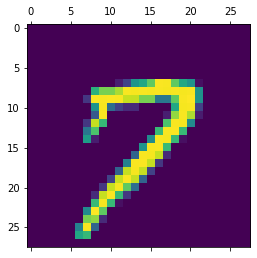

In [67]:
plt.matshow(x_train[599])

In [68]:
# Label of above data :
y_train[599]

7

In [69]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Converting the 2-D image values, to a flattened 1-D array.

In [70]:
# For Training Dataset
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [71]:
# For Test Dataset
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

Image Array after flattening :

In [72]:
x_test_flattened[3]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  11, 150, 253, 202,  31,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 251, 251, 253,
       107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 19

## Creating the Neural Network Model using Keras

In [73]:
model = keras.Sequential([
    keras.layers.Dense(units=10,input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 10.3424 - accuracy: 0.8370
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.0921 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7390 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.4638 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4000 - accuracy: 0.8869


In [74]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 5.6755 - accuracy: 0.8909


[5.675535202026367, 0.8909000158309937]